In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("data/Student Depression Dataset.csv")

print("Features in the dataset:")
display(df.dtypes)

display(df.head())

Features in the dataset:


id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df = df.dropna()

print("Amount of non-student entries:")
print (df[df["Profession"] != "Student"].shape[1])

le = LabelEncoder()

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

Amount of non-student entries:
18


In [4]:
print(df.describe())

                  id        Gender           Age          City    Profession  \
count   27898.000000  27898.000000  27898.000000  27898.000000  27898.000000   
mean    70442.953402      0.557244     25.822174     26.294107     10.993763   
std     40642.015063      0.496721      4.905651     16.356151      0.244003   
min         2.000000      0.000000     18.000000      0.000000      0.000000   
25%     35040.750000      0.000000     21.000000     14.000000     11.000000   
50%     70689.000000      1.000000     25.000000     24.000000     11.000000   
75%    105824.750000      1.000000     30.000000     44.000000     11.000000   
max    140699.000000      1.000000     59.000000     51.000000     13.000000   

       Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count       27898.000000   27898.000000  27898.000000        27898.000000   
mean            3.141336       0.000430      7.656160            2.943974   
std             1.381462       0.043994      1.4

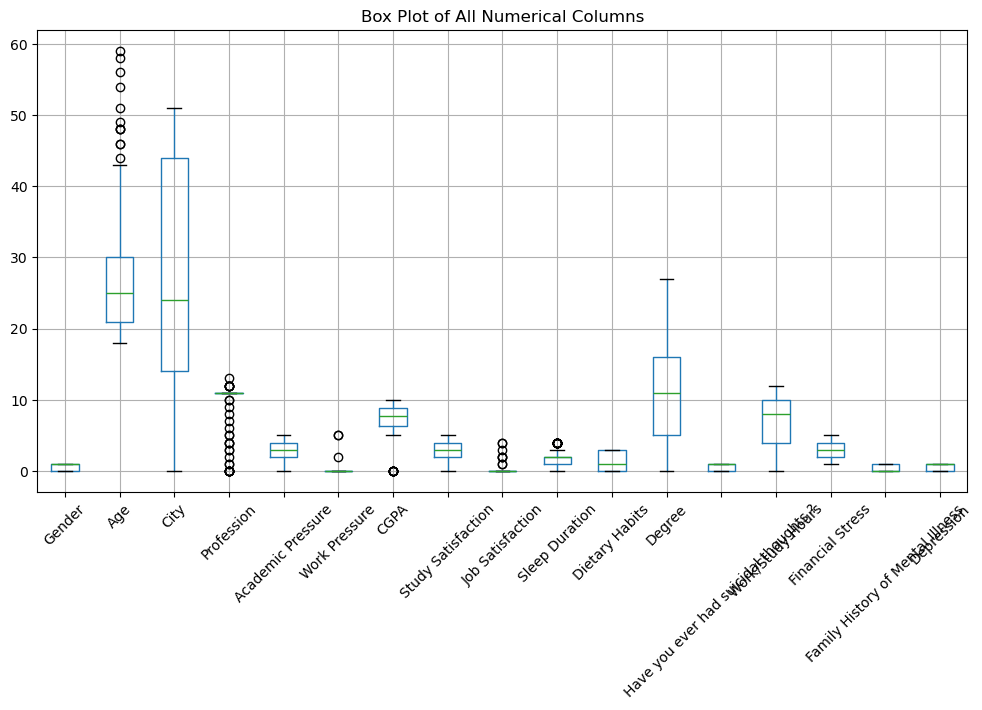

In [5]:
plt.figure(figsize=(12, 6))
df.drop("id", axis=1).boxplot(rot=45) 
plt.title("Box Plot of All Numerical Columns")
plt.show()

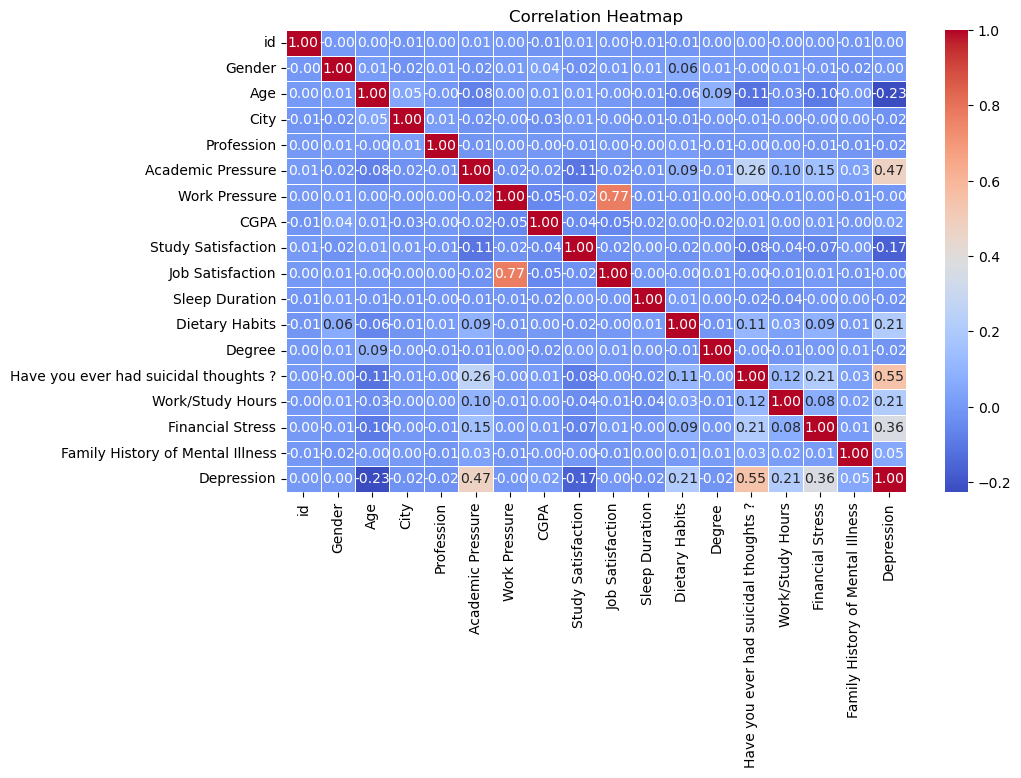

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and show
plt.title("Correlation Heatmap")
plt.show()

                                  Feature    Weight
11                                 Degree  0.000890
0                                  Gender  0.000984
8                        Job Satisfaction  0.001002
5                           Work Pressure  0.002300
2                                    City -0.003892
9                          Sleep Duration -0.004739
3                              Profession -0.005622
6                                    CGPA  0.010047
15       Family History of Mental Illness  0.016198
7                      Study Satisfaction -0.038848
13                       Work/Study Hours  0.049157
10                         Dietary Habits  0.050540
1                                     Age -0.064913
14                       Financial Stress  0.099213
4                       Academic Pressure  0.152011
12  Have you ever had suicidal thoughts ?  0.186095


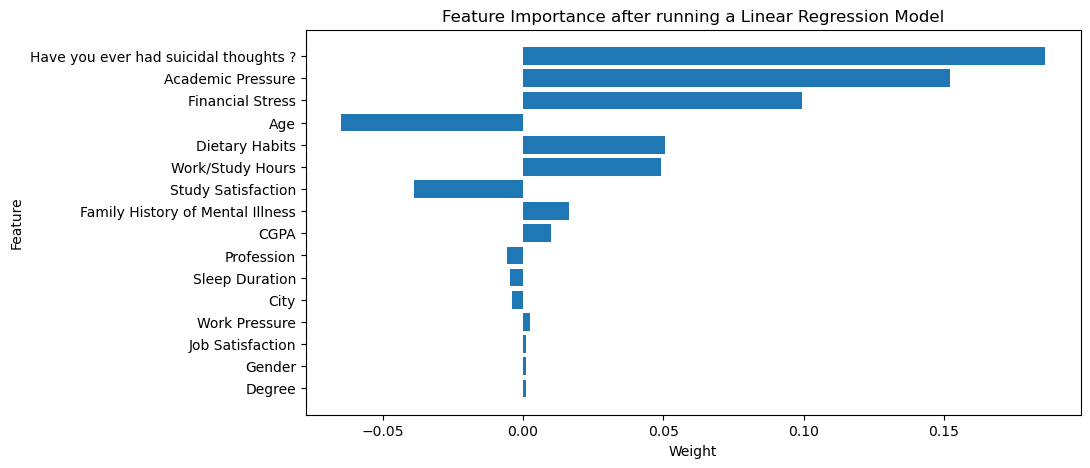

In [7]:
# Define target variable and features
target = "Depression"
features = df.drop(columns=["id", target])  # Exclude ID and target

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Get feature weights
feature_weights = pd.DataFrame({"Feature": features.columns, "Weight": model.coef_})
feature_weights = feature_weights.sort_values(by="Weight", key=abs, ascending=True)

# Display weights
print(feature_weights)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_weights["Feature"], feature_weights["Weight"])
plt.title("Feature Importance after running a Linear Regression Model")
plt.xlabel("Weight")
plt.ylabel("Feature")
plt.show()